<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Data2080.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [6]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi')
print(len(terinfeksi_data))
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi')
print(len(tidakTerinfeksi_data))
print(tidakTerinfeksi_data)

200
['C33P1thinF_IMG_20150619_114756a_cell_179.png', 'C33P1thinF_IMG_20150619_114756a_cell_182.png', 'C33P1thinF_IMG_20150619_114756a_cell_181.png', 'C33P1thinF_IMG_20150619_114756a_cell_180.png', 'C33P1thinF_IMG_20150619_115740a_cell_163.png', 'C33P1thinF_IMG_20150619_115740a_cell_162.png', 'C33P1thinF_IMG_20150619_115740a_cell_161.png', 'C33P1thinF_IMG_20150619_115808a_cell_205.png', 'C33P1thinF_IMG_20150619_115808a_cell_206.png', 'C33P1thinF_IMG_20150619_120645a_cell_217.png', 'C33P1thinF_IMG_20150619_120645a_cell_216.png', 'C33P1thinF_IMG_20150619_120645a_cell_215.png', 'C33P1thinF_IMG_20150619_120742a_cell_210.png', 'C33P1thinF_IMG_20150619_120804a_cell_224.png', 'C33P1thinF_IMG_20150619_120838a_cell_222.png', 'C33P1thinF_IMG_20150619_121102a_cell_193.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121411a_ce

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA2080/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DataBaru2080.csv", x, fmt='%s',delimiter=',' )

In [9]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DataBaru2080.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.013520  4.105438e-07  5.353142e-08  ...  2.694405e-10  6.253417e-14     1.0
1    0.016134  5.471398e-06  4.302842e-07  ... -1.335775e-10 -1.873219e-13     1.0
2    0.018783  2.231958e-06  5.393779e-08  ...  3.336873e-10  1.835801e-14     1.0
3    0.023085  3.748378e-05  1.083478e-07  ...  1.259026e-10 -8.148153e-16     1.0
4    0.032724  9.360229e-06  6.084419e-08  ... -4.993850e-10 -1.713192e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.017398  1.109720e-07  8.671000e-08  ...  2.606190e-11  6.759157e-15     0.0
996  0.014934  8.482377e-06  1.876040e-08  ...  2.335854e-11 -7.265898e-17     0.0
997  0.014418  1.121343e-05  8.411207e-08  ...  5.602203e-10 -5.981688e-15     0.0
998  0.019914  8.530760e-05  1.261099e-07  ... -5.104449e-10 -4.985950e-15     0.0
999  0.017790  1.713286e-05  2.010869e-08  ...  8.146109e-11  9.439136e-16     0.0

In [10]:
#split data (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.013520,4.105438e-07,5.353142e-08,4.211064e-07,-9.324107e-15,2.694405e-10,6.253417e-14
1,0.016134,5.471398e-06,4.302842e-07,4.716702e-07,1.003089e-13,-1.335775e-10,-1.873219e-13
2,0.018783,2.231958e-06,5.393779e-08,3.262890e-07,-3.920058e-14,3.336873e-10,1.835801e-14
3,0.023085,3.748378e-05,1.083478e-07,2.212270e-08,-7.135643e-16,1.259026e-10,-8.148153e-16
4,0.032724,9.360229e-06,6.084419e-08,1.992984e-07,1.371664e-14,-4.993850e-10,-1.713192e-14
...,...,...,...,...,...,...,...
995,0.017398,1.109720e-07,8.671000e-08,9.053971e-08,4.320812e-15,2.606190e-11,6.759157e-15
996,0.014934,8.482377e-06,1.876040e-08,8.021815e-09,-6.636858e-17,2.335854e-11,-7.265898e-17
997,0.014418,1.121343e-05,8.411207e-08,2.111069e-07,2.748753e-14,5.602203e-10,-5.981688e-15
998,0.019914,8.530760e-05,1.261099e-07,6.656184e-08,-3.511440e-15,-5.104449e-10,-4.985950e-15


0.0    720
1.0    180
Name: Actual, dtype: int64
0.0    80
1.0    20
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

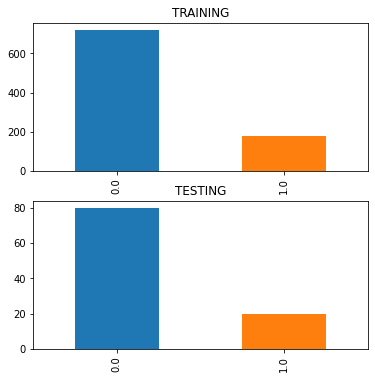

In [11]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [12]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-1.07105465e+00, -7.54082777e-01, -4.91113905e-01, ...,
        -2.76913265e-02, -2.58593212e-01,  3.06362920e-03],
       [-9.39611760e-01, -7.44058597e-01, -6.03645811e-01, ...,
        -2.72242412e-02, -2.59511487e-01,  3.15538052e-03],
       [-8.28823107e-01, -6.60663600e-01,  1.19436375e-01, ...,
        -1.90540501e-02, -2.73088346e-01, -4.08941273e-04],
       ...,
       [ 4.98088790e-01, -5.18151598e-01,  4.09927033e-01, ...,
         2.38956980e-01,  2.62747081e-02, -1.76833408e-01],
       [ 1.20434606e+00, -6.27527316e-01,  2.78058369e-01, ...,
         4.43056360e-01, -3.73585104e-01,  7.86727859e-03],
       [-8.60968181e-01, -1.08575220e-01, -4.95280068e-01, ...,
         3.30749225e-01,  1.10474049e+00, -4.58779226e-01]])

In [16]:
#u/ perulangan menampilkan semua nilai K

for x in range(2,900):   
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    
    #print result
    cm = confusion_matrix(y_test, y_pred)
    print("k = " , x)
    print (cm)
    print("Akurasi :" , accuracy_score(y_test, y_pred))
    print("presisi :" , precision_score(y_test, y_pred,average=None))
    print("recall :" , recall_score(y_test, y_pred,average=None))
    print("F-Score :" , f1_score(y_test, y_pred,average=None))
    print("--------------------------------------------")

k =  2
[[80  0]
 [15  5]]
Akurasi : 0.85
presisi : [0.84210526 1.        ]
recall : [1.   0.25]
F-Score : [0.91428571 0.4       ]
--------------------------------------------
k =  3
[[80  0]
 [12  8]]
Akurasi : 0.88
presisi : [0.86956522 1.        ]
recall : [1.  0.4]
F-Score : [0.93023256 0.57142857]
--------------------------------------------
k =  4
[[80  0]
 [12  8]]
Akurasi : 0.88
presisi : [0.86956522 1.        ]
recall : [1.  0.4]
F-Score : [0.93023256 0.57142857]
--------------------------------------------
k =  5
[[80  0]
 [11  9]]
Akurasi : 0.89
presisi : [0.87912088 1.        ]
recall : [1.   0.45]
F-Score : [0.93567251 0.62068966]
--------------------------------------------
k =  6
[[80  0]
 [14  6]]
Akurasi : 0.86
presisi : [0.85106383 1.        ]
recall : [1.  0.3]
F-Score : [0.91954023 0.46153846]
--------------------------------------------
k =  7
[[79  1]
 [12  8]]
Akurasi : 0.87
presisi : [0.86813187 0.88888889]
recall : [0.9875 0.4   ]
F-Score : [0.92397661 0.5517241

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  168
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  169
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  170
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  171
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  172
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  173
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  174
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  180
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  181
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  182
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  183
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  184
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  185
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  191
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  192
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  193
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  194
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  195
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  196
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  197
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  203
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  204
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  205
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  206
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  207
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  208
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  213
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  214
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  215
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  216
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  217
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  218
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  219
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  224
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  225
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  226
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  227
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  228
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  229
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  230
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  235
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  236
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  237
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  238
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  239
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  240
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  241
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  245
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  246
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  247
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  248
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  249
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  250
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  251
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  256
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  257
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  258
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  259
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  260
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  261
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  266
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  267
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  268
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  269
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  270
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  271
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  272
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  277
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  278
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  279
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  280
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  281
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  282
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  287
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  288
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  289
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  290
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  291
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  292
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  293
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  297
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  298
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  299
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  300
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  301
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  302
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  303
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  307
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  308
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  309
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  310
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  311
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  312
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  313
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  317
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  318
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  319
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  320
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  321
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  322
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  323
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  327
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  328
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  329
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  330
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  331
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  332
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  333
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  337
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  338
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  339
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  340
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  341
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  342
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  343
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  347
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  348
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  349
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  350
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  351
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  352
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  353
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  357
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  358
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  359
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  360
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  361
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  362
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  366
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  367
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  368
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  369
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  370
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  371
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  372
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  376
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  377
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  378
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  379
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  380
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  381
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
-

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  395
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  396
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  397
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  398
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  399
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  400
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  404
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  405
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  406
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  407
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  408
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  409
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  413
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  414
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  415
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  416
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  417
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  418
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
-

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  422
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  423
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  424
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  425
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  426
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  427
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  428
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


k =  432
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  433
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  434
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  435
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  436
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  437
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  438
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi :

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  441
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  442
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  443
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  444
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  445
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  446
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  447
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  450
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  451
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  452
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  453
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  454
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  455
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  456
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  459
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  460
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  461
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  462
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  463
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  464
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  465
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  468
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  469
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  470
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  471
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  472
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  473
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  474
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  477
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  478
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  479
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  480
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  481
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  482
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  483
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  486
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  487
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  488
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  489
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  490
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  491
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  492
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 [0.88888889 0.        ]
--------------------------------------------
k =  495
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  496
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  497
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  498
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  499
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  500
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
---------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  503
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  504
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  505
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  506
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  507
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  508
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  509
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  512
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  513
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  514
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  515
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  516
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  517
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  518
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  521
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  522
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  523
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  524
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  525
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  526
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  527
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  530
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  531
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  532
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  533
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  534
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  535
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  538
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  539
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  540
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  541
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  542
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  543
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  544
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  547
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  548
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  549
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  550
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  551
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  552
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  555
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  556
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  557
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  558
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  559
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  560
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  563
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  564
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  565
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  566
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  567
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  568
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  569
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  570
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  571
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  572
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  573
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  574
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  575
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  576
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  579
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  580
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  581
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  582
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  583
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  584
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  587
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  588
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  589
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  590
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  591
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  592
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

--------------------------------------------
k =  595
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  596
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  597
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  598
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  599
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  600
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  60

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  603
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  604
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  605
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  606
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  607
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  608
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  609
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  611
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  612
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  613
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  614
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  615
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  616
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  617
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  619
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  620
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  621
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  622
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  623
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  624
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  625
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  636
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  637
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  638
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  639
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  640
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  641
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  643
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  644
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  645
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  646
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  647
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  648
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  649
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  651
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  652
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  653
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  654
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  655
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  656
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  657
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  660
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  661
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  662
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  663
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  664
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  665
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  675
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  676
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  677
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  678
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  679
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  680
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  681
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  683
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  684
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  685
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  686
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  687
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  688
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  689
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  691
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  692
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  693
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  694
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  695
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  696
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  697
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  699
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  700
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  701
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  702
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  703
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  704
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  705
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  707
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  708
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  709
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  710
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  711
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  712
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  713
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  715
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  716
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  717
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  718
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  719
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  720
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  721
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  723
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  724
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  725
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  726
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  727
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  728
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  729
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


--------------------------------------------
k =  731
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  732
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  733
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  734
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  735
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  736
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  738
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  739
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  740
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  741
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  742
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  743
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  744
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  746
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  747
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  748
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  749
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  750
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  751
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  753
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  754
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  755
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  756
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  757
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  758
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  759
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  761
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  762
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  763
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  764
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  765
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  766
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
-

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  768
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  769
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  770
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  771
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  772
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  773
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  774
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  776
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  777
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  778
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  779
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  780
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  781
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  782
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  784
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  785
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  786
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  787
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  788
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  789
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  791
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  792
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  793
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  794
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  795
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  796
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  798
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  799
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  800
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  801
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  802
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  803
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  805
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  806
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  807
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  808
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  809
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  810
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

[0.88888889 0.        ]
--------------------------------------------
k =  812
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  813
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  814
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  815
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  816
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  817
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
----------------------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  819
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  820
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  821
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  822
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  823
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  824
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  825
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  827
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  828
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  829
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  830
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  831
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  832
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
---------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  841
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  842
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  843
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  844
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  845
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  846
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  847
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  849
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  850
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  851
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  852
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  853
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  854
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  855
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  856
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  857
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  858
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  859
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  860
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  861
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  862
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr


F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  863
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  864
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  865
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  866
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  867
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  868
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
-----------------

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

 869
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  870
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  871
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  872
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  873
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  874
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  875
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  876
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  877
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  878
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  879
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  880
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  881
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  882
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  883
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  884
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  885
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  886
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  887
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  888
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  889
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  890
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  891
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  892
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  893
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  894
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  895
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  896
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

k =  897
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  898
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------
k =  899
[[80  0]
 [20  0]]
Akurasi : 0.8
presisi : [0.8 0. ]
recall : [1. 0.]
F-Score : [0.88888889 0.        ]
--------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
#u/ perulangan lgsng mencari nilai K yang mempunyai akurasi tertinggi

akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred)
        r = recall_score(y_test, y_pred)
        f = f1_score(y_test, y_pred)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 9
[[80  0]
 [11  9]]
Akurasi : 0.89
presisi : 1.0
recall : 0.45
F-Score : 0.6206896551724138
--------------------------------------------
